**RQ2: How does SLIM_GSGP behave in terms of performance and model size compared to standard GP and traditional GSGP?**

Experimental Setup:

10 (will be 30 for the final version) Monte Carlo Runs for 18 Datasets with the fixed configurations:


config_all = {

    'pop_size': 100, #will be 200 for final version
    'n_iter': 500,  #will be 2000 for final version
    'elitism': True,
    'n_elites': 1,
    'init_depth': 6,
    'initializer': 'rhh',
    'tournament_size': 2,
    'prob_const': 0.2,
    'tree_functions': ['add', 'subtract', 'multiply', 'divide'],
    'tree_constants': np.linspace(-10, 10, num=201).round(1).tolist(),
    'fitness_function': sigmoid_rmse,
    'minimization' : True,
    'seed': None, #based on monte_carlo_run
    'log_path' : None, #based on monte_carlo_run
    'verbose': False,
    'log_level': 0,
    'test_elite': True

}

basic_config_gp = {

    'p_xo': 0.8,
    'max_depth': 17

}

basic_config_gsgp = {

    'p_xo': 0,
    'ms_lower': 0,
    'ms_upper': 1,
    'reconstruct' : True

}

basic_config_slim= {

    'slim_version': None, #for all versions
    'ms_lower': 0,
    'ms_upper': 1,
    'p_inflate': 0.5,
    'reconstruct': True,
    'copy_parent': True

}









In [1]:
import sys
import os
sys.path.insert(0, os.path.abspath("../"))
from analysis import *
import warnings
warnings.filterwarnings("ignore")

In [2]:
%%capture
ana_compa = ComparisonAnalysis('RQ_Comparison')

In [3]:
ana_compa.logs['algorithm'].unique()

array(['GP', 'GSGP', 'SLIM*SIG1', 'SLIM+SIG1'], dtype=object)

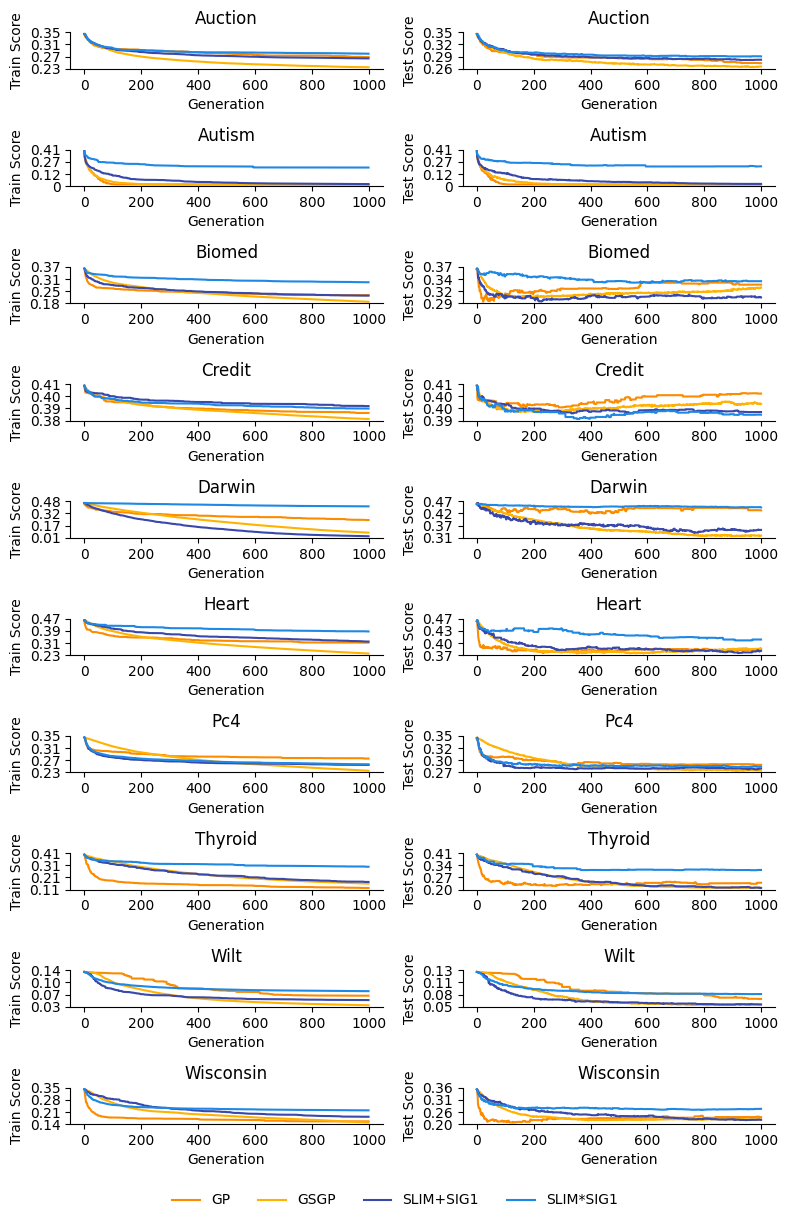

In [4]:
ana_compa.performance_evolution_plot[0]

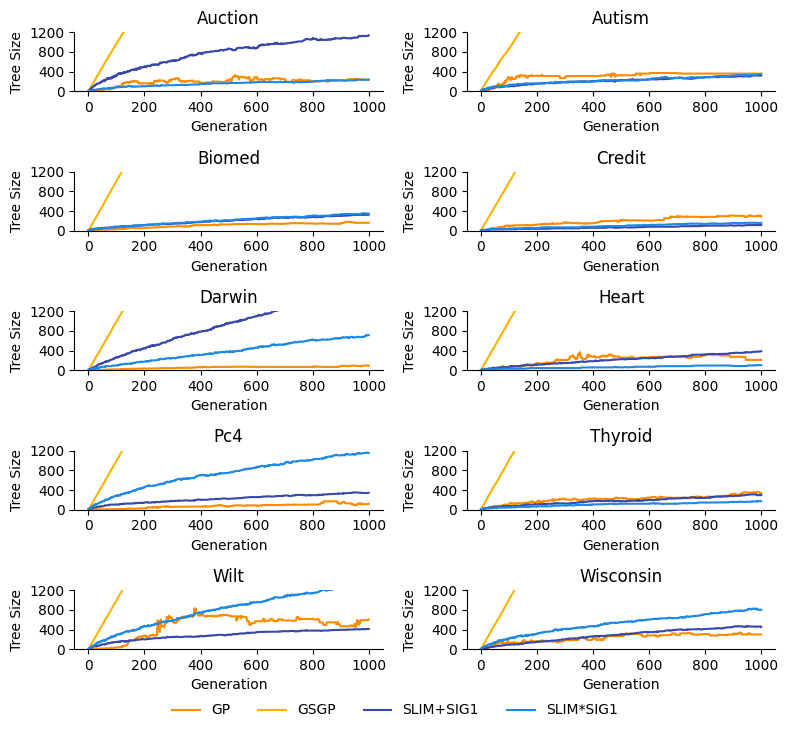

In [5]:
ana_compa.tree_size_evolution_plot[0]

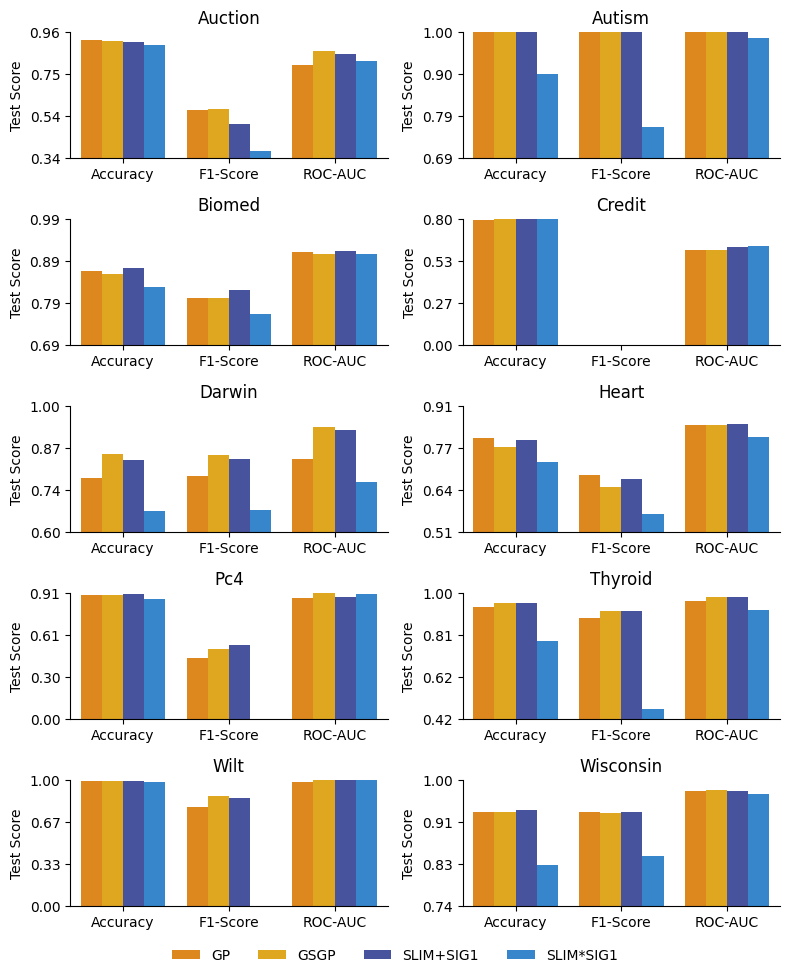

In [6]:
ana_compa.performance_plot[0]

In [7]:
ana_compa.results['algorithm'].unique()

array(['GP', 'GSGP', 'SLIM*SIG1', 'SLIM+SIG1'], dtype=object)

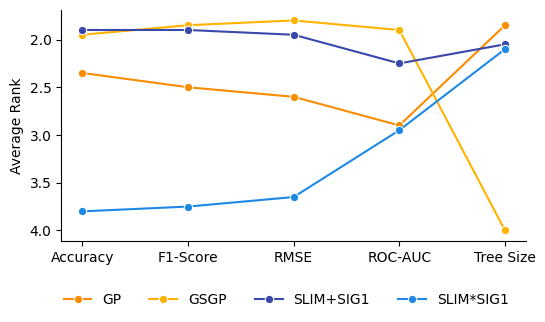

In [8]:
ana_compa.ranks_plot[0]

In [9]:
ana_compa.friedman_pvalues

,Metric,P-Value,Significant
0,Accuracy,0.001591,Yes
1,F1-Score,0.002385,Yes
4,RMSE,0.001817,Yes
2,ROC-AUC,0.181558,No
3,Tree Size,0.000152,Yes


In [10]:
ana_compa.wtl_1v1

Metric,Algorithm,Accuracy,F1-Score,RMSE,ROC-AUC,Tree Size
0,GP vs GSGP,1-6-3,1-4-5,1-4-5,0-5-5,10-0-0
1,GP vs SLIM*SIG1,9-0-1,9-0-1,7-2-1,4-3-3,5-2-3
2,GP vs SLIM+SIG1,2-3-5,1-4-5,2-2-6,0-6-4,3-5-2
3,GSGP vs SLIM*SIG1,9-1-0,9-0-1,9-0-1,6-2-2,0-0-10
4,GSGP vs SLIM+SIG1,1-8-1,2-7-1,4-4-2,4-5-1,0-0-10
5,SLIM*SIG1 vs SLIM+SIG1,0-1-9,0-1-9,0-1-9,1-4-5,4-2-4


In [11]:
get_wilcoxon_rank_pvalues(ana_compa.wtl_detailed, 'algorithm')

,metric,algorithm_1,algorithm_2,p_value,significant
0,test.accuracy,GP,GSGP,0.194366,False
1,test.accuracy,GP,SLIM*SIG1,0.005859,True
2,test.accuracy,GP,SLIM+SIG1,0.305291,False
3,test.accuracy,GSGP,GP,0.194366,False
4,test.accuracy,GSGP,SLIM*SIG1,0.003906,True
5,test.accuracy,GSGP,SLIM+SIG1,0.785495,False
6,test.accuracy,SLIM*SIG1,GP,0.009766,True
7,test.accuracy,SLIM*SIG1,GSGP,0.003906,True
8,test.accuracy,SLIM*SIG1,SLIM+SIG1,0.003906,True
9,test.accuracy,SLIM+SIG1,GP,0.305291,False
